<a href="https://colab.research.google.com/github/inocentejr/CODE7_IFSP_SLT/blob/main/Aula%201/Simulacao_Motor_DC_PID_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Simulação de Motor DC com Python

In [ ]:
pip install control

     |████████████████████████████████| 357 kB 7.4 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=4ccf69b55d3d43f89d12fb3cac76bf830a845342b86abe94f5dad091b8c817d3
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


## Carregamento dos módulos necessários

Para rodar este programa precisaremos dos módulos:

- control
- plotly.express
- matplotlib.pyplot

In [ ]:
import control
import plotly.express as px
import matplotlib.pyplot as plt

# Modelagem do Motor

A simulação do sistema dinâmico utiliza funções muito parecidas com as do Control Toolbox do MATLAB.

In [ ]:
## Parâmetros físicos do motor

J = 0.01 #Inércia do rotor [kgm²/s²]
B = 0.1 #Atrito viscoso do rotor [Nms]
Kv = 0.01
Kt = 0.01
Ra = 1 #Resistência elétrica da armadura [Ohm]
La = 0.5 #Indutância da armadura [H]

## Função de Transferência
s = control.tf('s') 
G = Kt/((J*s+B)*(Ra+La*s)+Kv*Kt)
G

TransferFunction(array([0.01]), array([0.005 , 0.06  , 0.1001]))

## Resposta ao Degrau da Planta

In [ ]:
t,y = control.step_response(G)

## Plot dos resultados utilizando o módulo plotly.express

In [ ]:
fig = px.line(x=t,y=y,title='Resposta ao Degrau do Motor CC')
fig = fig.update_layout(xaxis_title='Tempo [s]',yaxis_title = 'Velocidade Angular [rad/s]')
fig.show()

## Plot dos resultados utilizando o módulo matplotlib.pyplot

Text(0.5, 0.98, 'Resposta ao Degrau')

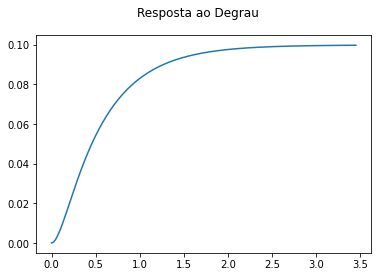

In [ ]:
fig,ax = plt.subplots()
ax.plot(t,y)
fig.suptitle('Resposta ao Degrau')

# Modelagem do Controlador PID

In [ ]:
## Controlador
Kp = 1
Ki = 0
Kd = 0

K = Kp+1/s*Ki+s*Kd
K

TransferFunction(array([1.]), array([1.]))

# Sistema em Malha Fechada

In [ ]:
T = control.feedback(K*G,1)
T

TransferFunction(array([0.01]), array([0.005 , 0.06  , 0.1101]))

## Resposta ao Degrau do Sistema em Malha Fechada

In [ ]:
t2,y2 = control.step_response(T)

px.line(x=t2,y=y2,title = 'Resposta ao Degrau - Malha Fechada')